In [34]:
import numpy as np


data_02 = np.load('exp_result/state_dynamics/sasaki/new_metric/eta0.2/1/stats/init_dist_history.npy')
data_2 = np.load('exp_result/state_dynamics/sasaki/new_metric/eta2/1/stats/init_dist_history.npy')
data_5 = np.load('exp_result/state_dynamics/sasaki/new_metric/eta5/1/stats/init_dist_history.npy')

print(data_02.shape,data_2.shape,data_5.shape)

(2999, 25) (2315, 25) (2231, 25)


In [35]:
def cal_lyapunov_exponent(distance_traj, terminal_time=1, eps=1e-3):
    '''
    From BCSDM curve_analysis.py
    '''
    # input = ((nd), nt)
    input_size = distance_traj.shape
    len_traj = input_size[-1]
    if len(input_size) == 2:
        multitraj=True
    else:
        multitraj=False
        ## added ##
        distance_traj = distance_traj.unsqueeze(0)
    
    ## original ##
    # t_linspace = torch.linspace(0, terminal_time, len_traj).to(distance_traj)
    # if multitraj:
    #     t_linspace = t_linspace.unsqueeze(0).repeat(input_size[0], 1).to(distance_traj)
    # log_dist_traj = torch.log(distance_traj).unsqueeze(-1) # ((nd), nt, 1)
    # log_d0 = log_dist_traj[..., 0:1, 0:1]
    # lamb = (torch.pinverse(t_linspace.unsqueeze(-1)) 
    #         @ (log_d0 - log_dist_traj)).squeeze().squeeze()
    
    ## fixed to truncate distance traj ##
    lamb_list = []
    for i in range(len(distance_traj)):
        for j in range(len(distance_traj[i])):
            if distance_traj[i][j] < eps:
                distance_truncated = distance_traj[i][:j+1]
                # termial_time = j * (terminal_time / len_traj)
                print(j)
                break
            else:
                distance_truncated = distance_traj[i]
                print
        
        t_linspace = torch.linspace(0, terminal_time, len(distance_truncated)).to(distance_traj)
        log_dist_traj = torch.log(distance_truncated).unsqueeze(-1) # ((nd), nt, 1)
        log_d0 = log_dist_traj[..., 0:1, 0:1]
        lamb = (torch.pinverse(t_linspace.unsqueeze(-1)) 
                @ (log_d0 - log_dist_traj)).squeeze().squeeze()
        lamb_list.append(lamb)
    lamb = torch.tensor(lamb_list)
    # shape: (nd, ) or ()
    return lamb


1119
332
160
tensor([3.7790], dtype=torch.float64) tensor([3.6847], dtype=torch.float64) tensor([3.8366], dtype=torch.float64)


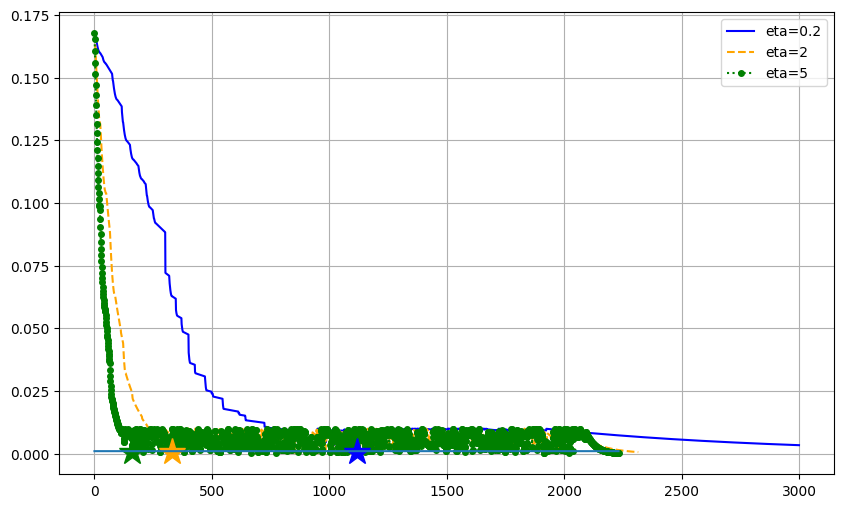

In [39]:
import torch
idx = 1

torch_data02 = torch.from_numpy(data_02[:,idx])
torch_data2 = torch.from_numpy(data_2[:,idx])
torch_data5 = torch.from_numpy(data_5[:,idx])

ly02 = cal_lyapunov_exponent(torch_data02)
ly2 = cal_lyapunov_exponent(torch_data2)
ly3 = cal_lyapunov_exponent(torch_data5)

print(ly02, ly2, ly3)

import matplotlib.pyplot as plt
import numpy as np

# 서로 다른 길이의 데이터 3개 생성
y1 = data_02[:,idx]
y2 = data_2[:,idx]
y3 = data_5[:,idx]
y4 = np.ones_like(y3) * 1e-3

# 각 데이터에 맞는 x축 데이터 생성
x1 = np.arange(len(y1))
x2 = np.arange(len(y2))
x3 = np.arange(len(y3))

# 그래프 설정
plt.figure(figsize=(10, 6))

# 데이터 1 플롯 (파란색 실선)
plt.plot(x1, y1, label='eta=0.2', color='blue', linestyle='-')


# 데이터 2 플롯 (주황색 점선)
plt.plot(x2, y2, label='eta=2', color='orange', linestyle='--')


# 데이터 3 플롯 (녹색 점)
plt.plot(x3, y3, label='eta=5', color='green', linestyle=':', marker='o', markersize=4)



plt.plot(x1[1119], y1[1119], color='blue', marker='*',markersize=20)
plt.plot(x2[332], y2[332], color='orange', marker='*',markersize=20)
plt.plot(x3[160], y3[160], color='green', marker='*',markersize=20)

plt.plot(x3, y4)

# 제목과 레이블 설정

plt.legend()
plt.grid(True)

# 그래프 보여주기
plt.show()

ValueError: x and y must have same first dimension, but have shapes (1119,) and (772,)

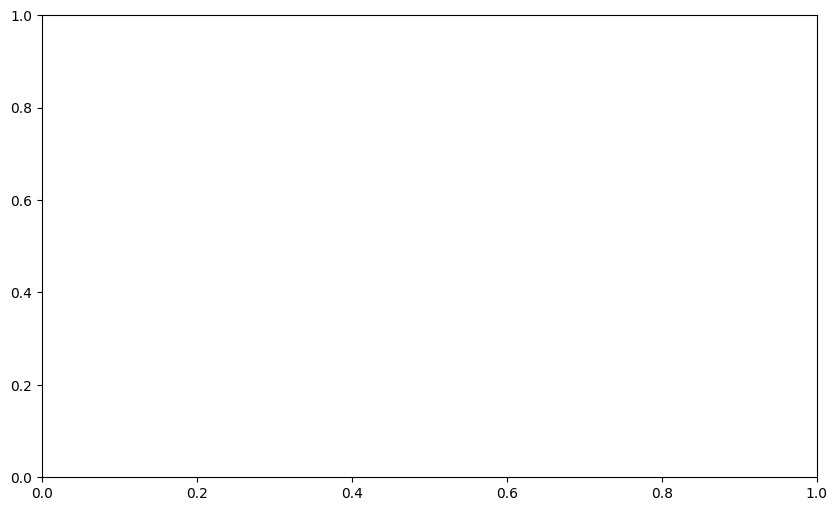

In [ ]:
t1=1119
t2=332
t3=160

x1 = np.linspace(0,1,1119)
x2 = np.linspace(0,1,332)
x3 = np.linspace(0,1,160)

plt.figure(figsize=(10, 6))

# 데이터 1 플롯 (파란색 실선)
plt.plot(x1, y1[:772], label='eta=0.2', color='blue', linestyle='-',marker='o')
plt.plot(x1, np.exp(-2.8075*x1)*y1[0], color='blue', linestyle='--')


# 데이터 2 플롯 (주황색 점선)
plt.plot(x2, y2[:235], label='eta=2', color='orange', linestyle='--',marker='o')
plt.plot(x2, np.exp(-2.8202*x2)*y2[0], color='orange', linestyle='--')


# 데이터 3 플롯 (녹색 점)
plt.plot(x3, y3[:106], label='eta=5', color='green', linestyle=':', marker='o')
plt.plot(x3, np.exp(-2.7934*x3)*y3[0], color='green', linestyle='--')
plt.legend()

In [27]:
data = np.load('exp_result/state_dynamics/sasaki/new_metric/eta5/7/stats/all_dist_history.npy')

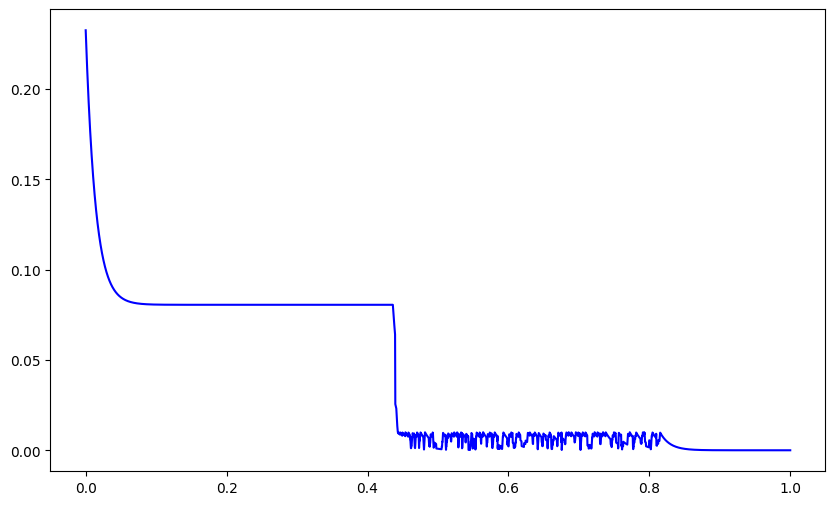

In [28]:

y1 = data[:,0]
x1 = np.linspace(0,1,len(y1))
# 그래프 설정
plt.figure(figsize=(10, 6))

# 데이터 1 플롯 (파란색 실선)
plt.plot(x1, y1, label='eta=0.2', color='blue', linestyle='-')